In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

## SPD - slack parameter study - 40 Nodes

In [80]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_3\\data_spd_2_n_40_p_900_pdf.csv')

In [81]:
df.head()

,run,PauseTime,repetition,Module,echoedPk:count,echoedPk:sum(packetBytes),packetReceived:count,packetReceived:sum(packetBytes),packets received,packets sent,packetSent:count,packetSent:sum(packetBytes)
0,RandomWaypointMobility-SPD-B-81-20220107-23:53...,900,21,TARPNetwork.node[17].app[0],NaN,NaN,861.0,861000.0,861.0,900.0,900.0,900000.0
1,RandomWaypointMobility-SPD-B-70-20220107-23:51...,900,10,TARPNetwork.node[17].app[0],NaN,NaN,21.0,21000.0,21.0,900.0,900.0,900000.0
2,RandomWaypointMobility-SPD-B-60-20220107-23:49...,900,0,TARPNetwork.node[22].app[0],794.0,794000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,RandomWaypointMobility-SPD-B-60-20220107-23:49...,900,0,TARPNetwork.node[17].app[0],NaN,NaN,1.0,1000.0,1.0,900.0,900.0,900000.0
4,RandomWaypointMobility-SPD-B-70-20220107-23:51...,900,10,TARPNetwork.node[22].app[0],68.0,68000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [83]:
df = df.sort_values(by=['repetition'])

In [84]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [85]:
results = []
results_x = []
count = 0

for index, row in df_17.iterrows():
        x = df_22.iloc[count]["echoedPk:count"]
        res = round((row['packetReceived:count'] + x)/(x + row['packetSent:count']), 4) 
        results.append(res)
        res_x = round((x)/(row['packetSent:count']), 4) 
        results_x.append(res_x)
        count+=1


In [86]:
print (results)   

[0.4693, 0.9658, 0.9794, 0.9532, 0.9878, 0.9358, 0.9465, 0.9561, 0.9516, 0.9429, 0.0919, 0.1849, 0.9704, 0.5592, 0.166, 0.9861, 0.5162, 0.9882, 0.9383, 0.1238, 0.5469, 0.9782, 0.9473, 0.0392, 0.1385, 0.9498, 0.9071, 0.978, 0.9541, 0.9497]


In [87]:
print (results_x) 

[0.8822, 0.9833, 0.9989, 0.9956, 0.9989, 0.8856, 0.93, 0.9989, 0.9989, 0.9067, 0.0756, 0.1178, 0.9489, 0.9989, 0.0978, 0.9989, 0.9844, 0.9844, 0.8911, 0.0767, 0.9911, 0.9911, 0.9189, 0.0211, 0.0833, 0.9911, 0.8422, 0.9733, 0.9122, 0.9456]


In [88]:
print("Mean:", round(sum(results) / len(results)*100,2))

Mean: 73.34


In [89]:
print("Mean:", round(sum(results_x) / len(results_x)*100,2))

Mean: 78.08


In [2]:
df_dd_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[90.18, 83.92, 81.15, 80.29, 74.82, 75.87, 66.47, 80.8]})

dd_x_errors = [1.58, 2.15, 2.89, 2.92, 4.59, 6.21, 10.5, 12.7]


df_spd_1_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[64.03, 56.37, 51.55, 53.91, 50.97, 62.06, 56.86, 76.08]})

spd_1_x_errors = [2.91, 3.03, 2.84, 4.1, 3.65, 6.16, 10.5, 12.6]


df_spd_2_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[72.84, 66.88, 62.46, 61.42, 60.45, 67.94, 60.2, 78.08]})

spd_2_x_errors = [3.23, 2.31, 3.14, 3.75, 4.04, 6.3, 10.4, 12.7]

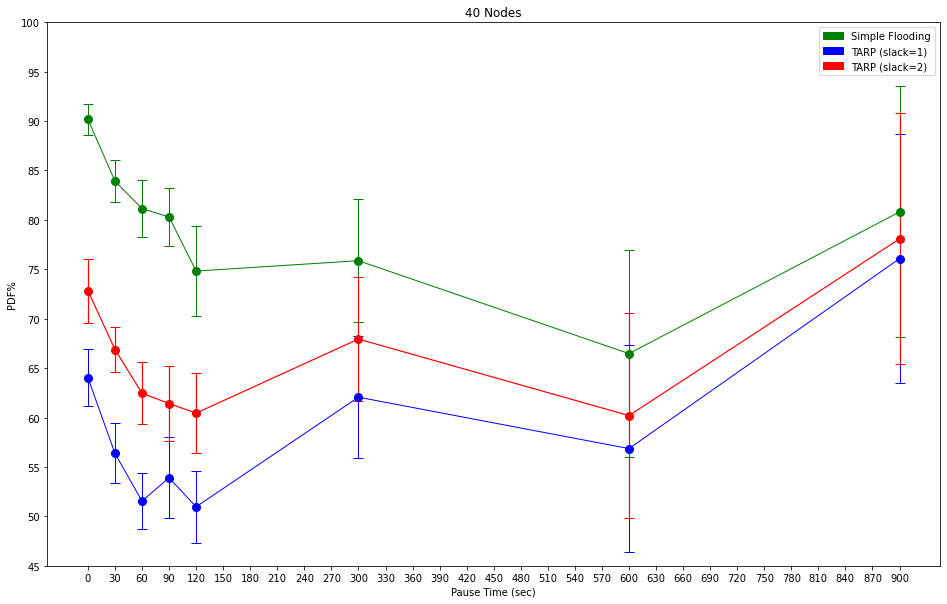

In [4]:
plt.xlabel("Pause Time (sec)")
plt.ylabel("PDF%")
plt.title("40 Nodes")

plt.xticks(np.arange(0,901, 30))
plt.yticks(np.arange(0,101, 5))
# plt.grid()

# plt.plot(df_dd_x.PauseTime, df_dd_x.PDF,  'g-x') 

# plt.plot(df_spd_1_x.PauseTime, df_spd_1_x.PDF,  'b-x') 

# plt.plot(df_spd_2_x.PauseTime, df_spd_2_x.PDF,  'r-x') 

plt.ylim([45, 100])

plt.errorbar(
  x=df_dd_x.PauseTime, 
  y=df_dd_x.PDF, 
  yerr=dd_x_errors, 
  capsize=5,
  marker='o', 
  color='green', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_1_x.PauseTime, 
  y=df_spd_1_x.PDF, 
  yerr=spd_1_x_errors, 
  capsize=5,
  marker='o', 
  color='blue', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_x.PauseTime, 
  y=df_spd_2_x.PDF, 
  yerr=spd_2_x_errors, 
  capsize=5,
  marker='o', 
  color='red', 
  markersize=8, 
  linewidth=1.2, 
  linestyle='-')

red_patch = mpatches.Patch(color='red', label='TARP (slack=2)')
green_patch = mpatches.Patch(color='green', label='Simple Flooding')
blue_patch = mpatches.Patch(color='blue', label='TARP (slack=1)')

plt.legend(handles=[ green_patch, blue_patch, red_patch])

fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.savefig('final-simulation-pdf-40-new-1.png', dpi=300)